In [1]:
import pennylane as qml
import tensorflow as tf
import numpy as np
from PIL import Image

In [2]:
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev, interface='tf')
def circuit(input):
    qml.RY(input[0, 0]/255, wires=0)
    qml.RY(input[1, 0]/255, wires=1)
    qml.RY(input[1, 1]/255, wires=2)
    qml.RY(input[0, 1]/255, wires=3)
    qml.RY(3.44, wires=2)
    qml.RY(4.39, wires=3)
    qml.RY(0.58, wires=3)
    qml.RY(1.63, wires=3)
    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

In [3]:
img_given = Image.open("../image(1).jpg")
img_given = img_given.resize((128, 128))
img_array = np.asarray(img_given)[:,:,0]

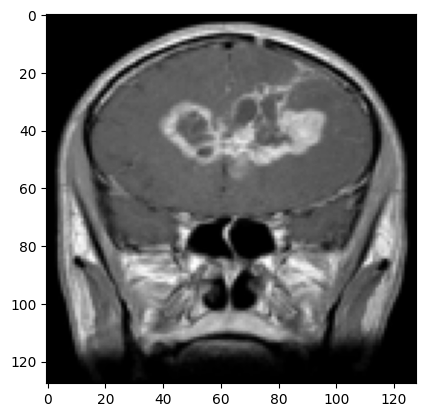

In [4]:
import matplotlib.pyplot as plt

plt.imshow(img_array, cmap='gray')

In [5]:
conv_generated = np.zeros((64, 64, 4))

for i in range(0, 128, 2):
    for j in range(0, 128, 2):
        window = img_array[i:i+2, j:j+2]
        output = circuit(window)
        conv_generated[i//2, j//2, 0] = output[0]
        conv_generated[i//2, j//2, 1] = output[1]
        conv_generated[i//2, j//2, 2] = output[2]
        conv_generated[i//2, j//2, 3] = output[3]

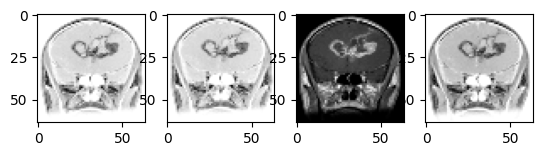

In [6]:
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(conv_generated[:,:,i], cmap='gray')